In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Reading data from sqlite
import sqlite3
connection=sqlite3.connect(r'/Users/puravdoshi/Desktop/Data Analysis with Python/Data Analytics Projects/Zomato_analysis/zomato_rawdata.sqlite')

In [3]:
# Check online its table name on https://sqliteonline.com/
df=pd.read_sql_query("SELECT * FROM Users" , connection)
df.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
2      2  https://www.zomato.com/SanchurroBangalore?cont...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [4]:
df.shape

(51717, 18)

In [5]:
# Dealing with missing values
df.isnull().sum()/len(df)*100 # calculating the percentage of values

index                           0.000000
url                             0.000000
address                         0.000000
name                            0.000000
online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
phone                           2.335789
location                        0.040606
rest_type                       0.438927
dish_liked                     54.291626
cuisines                        0.087012
approx_cost(for two people)     0.669026
reviews_list                    0.000000
menu_item                       0.000000
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [6]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', None, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [7]:
df['rate'].replace(('NEW','-',None),np.nan,inplace=True)
df['rate'].unique()

/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_1461/40293457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rate'].replace(('NEW','-',None),np.nan,inplace=True)


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', nan, '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [8]:
"4.1/5".split('/')[0]
df['rate'] = df['rate'].apply(lambda x : float(x.split('/')[0]) if type(x)==str else x)

In [9]:
df['rate']

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [10]:
# Is there a relation between online order option and rating of the restaurant ?
new_df=pd.crosstab(df.rate,df.online_order)
new_df

online_order    No   Yes
rate                    
1.8              5     0
2.0             11     0
2.1              9    15
2.2             10    16
2.3             29    22
2.4             36    34
2.5             38    63
2.6             83   177
2.7            141   166
2.8            224   376
2.9            314   488
3.0            439   584
3.1            587   974
3.2            829  1044
3.3           1137  1173
3.4           1024  1452
3.5           1090  1694
3.6           1090  2226
3.7           1172  2649
3.8           1147  2726
3.9           1017  2955
4.0            874  2309
4.1            843  2105
4.2            648  1536
4.3            692  1001
4.4            374   773
4.5            297   359
4.6            140   160
4.7            113    54
4.8             34    32
4.9             12    43

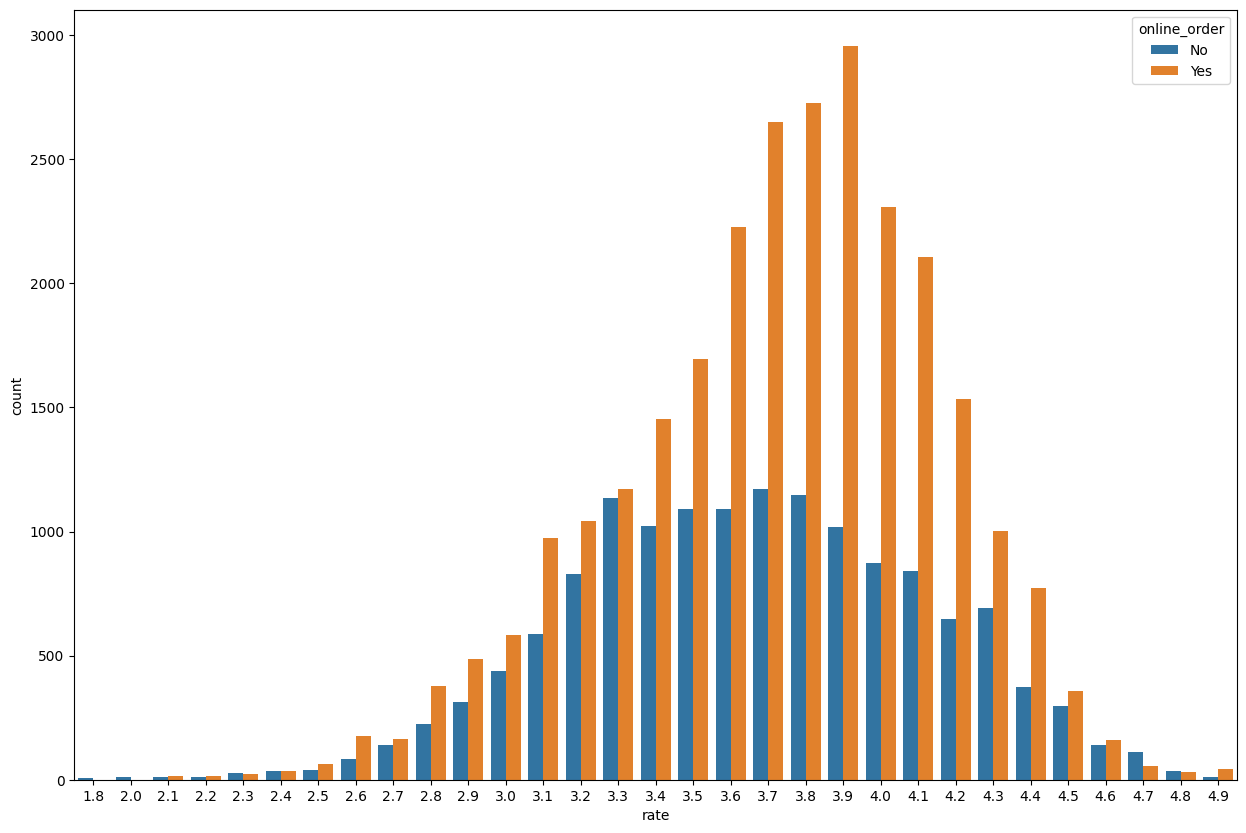

In [11]:
plt.figure(figsize=(15,10))
sns.countplot(x='rate',data=df,hue='online_order')
plt.show()

In [12]:
new_df.sum(axis=1)

rate
1.8       5
2.0      11
2.1      24
2.2      26
2.3      51
2.4      70
2.5     101
2.6     260
2.7     307
2.8     600
2.9     802
3.0    1023
3.1    1561
3.2    1873
3.3    2310
3.4    2476
3.5    2784
3.6    3316
3.7    3821
3.8    3873
3.9    3972
4.0    3183
4.1    2948
4.2    2184
4.3    1693
4.4    1147
4.5     656
4.6     300
4.7     167
4.8      66
4.9      55
dtype: int64

In [13]:
normalize_df = new_df.div(new_df.sum(axis=1).astype(float) , axis=0)
normalize_df

online_order        No       Yes
rate                            
1.8           1.000000  0.000000
2.0           1.000000  0.000000
2.1           0.375000  0.625000
2.2           0.384615  0.615385
2.3           0.568627  0.431373
2.4           0.514286  0.485714
2.5           0.376238  0.623762
2.6           0.319231  0.680769
2.7           0.459283  0.540717
2.8           0.373333  0.626667
2.9           0.391521  0.608479
3.0           0.429130  0.570870
3.1           0.376041  0.623959
3.2           0.442605  0.557395
3.3           0.492208  0.507792
3.4           0.413570  0.586430
3.5           0.391523  0.608477
3.6           0.328709  0.671291
3.7           0.306726  0.693274
3.8           0.296153  0.703847
3.9           0.256042  0.743958
4.0           0.274584  0.725416
4.1           0.285957  0.714043
4.2           0.296703  0.703297
4.3           0.408742  0.591258
4.4           0.326068  0.673932
4.5           0.452744  0.547256
4.6           0.466667  0.533333
4.7           0.676647  0.323353
4.8           0.515152  0.484848
4.9           0.218182  0.781818

In [14]:
# Data Cleaning to perform text analysis
df['rest_type'].isnull().sum()

np.int64(227)

In [15]:
data = df.dropna(subset=['rest_type'])
data['rest_type'].isnull().sum()
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [16]:
quick_bites_df = data[data['rest_type'].str.contains('Quick Bites')]
quick_bites_df.columns

Index(['index', 'url', 'address', 'name', 'online_order', 'book_table', 'rate',
       'votes', 'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [17]:
quick_bites_df['reviews_list']

3        [('Rated 4.0', "RATED\n  Great food and proper...
23       [('Rated 4.0', "RATED\n  So, went here with fr...
26       [('Rated 5.0', 'RATED\n  please provide some e...
31       [('Rated 1.0', "RATED\n  Worst restaurant ever...
34       [('Rated 3.0', 'RATED\n  Not worth for the mon...
                               ...                        
51641    [('Rated 2.0', "RATED\n  Food is not upto the ...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [('Rated 5.0', "RATED\n  I was randomly lookin...
Name: reviews_list, Length: 20639, dtype: object

In [18]:
quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())

/var/folders/6b/1hdxxqbn1gx40rtc5xgkfkqc0000gn/T/ipykernel_1461/4206969916.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  quick_bites_df['reviews_list'] = quick_bites_df['reviews_list'].apply(lambda x:x.lower())


In [19]:
from nltk.corpus import RegexpTokenizer

In [20]:
# Tokenization
tokenizer=RegexpTokenizer('[a-zA-Z]+')
tokenizer

RegexpTokenizer(pattern='[a-zA-Z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)

In [21]:
## tokenize data of third review
tokenizer.tokenize(quick_bites_df['reviews_list'][3])

['rated',
 'rated',
 'n',
 'great',
 'food',
 'and',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'been',
 'there',
 'twice',
 'and',
 'was',
 'fully',
 'satisfied',
 'will',
 'give',
 'stars',
 'if',
 'it',
 's',
 'well',
 'managed',
 'rated',
 'rated',
 'n',
 'reached',
 'the',
 'place',
 'at',
 'pm',
 'on',
 'saturday',
 'half',
 'of',
 'the',
 'items',
 'on',
 'the',
 'menu',
 'were',
 'over',
 'what',
 'was',
 'annoying',
 'was',
 'is',
 'the',
 'food',
 'was',
 'cold',
 'the',
 'taste',
 'was',
 'also',
 'very',
 'average',
 'only',
 'dosa',
 'and',
 'holige',
 'were',
 'good',
 'there',
 'were',
 'very',
 'few',
 'people',
 'in',
 'the',
 'restaurant',
 'and',
 'the',
 'service',
 'was',
 'still',
 'very',
 'slow',
 'the',
 'waiters',
 'were',
 'all',
 'standing',
 'in',
 'one',
 'corner',
 'and',
 'talking',
 'had',
 'to',
 'call',
 'them',
 'repeatedly',
 'rated',
 'rated',
 'n',
 'had',
 'been',
 'here',
 'good',
 'food',
 'served',
 'and',
 'tasty',
 'good',
 'plac

In [22]:
review_tokens=quick_bites_df['reviews_list'].apply(tokenizer.tokenize)

In [23]:
len(review_tokens)

20639

In [24]:
# Removal of stop words
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/puravdoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
# These are common words defined by Python developers that typically don't add meaning to the text and can be removed
stop = stopwords.words('english')
print(stop)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [26]:
stop.extend(['rated' , "n" , "nan" , "x" , "RATED" , "Rated"])
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
review_tokens

3        [rated, rated, n, great, food, and, proper, ka...
23       [rated, rated, n, so, went, here, with, friend...
26       [rated, rated, n, please, provide, some, extra...
31       [rated, rated, n, worst, restaurant, ever, veg...
34       [rated, rated, n, not, worth, for, the, money,...
                               ...                        
51641    [rated, rated, n, food, is, not, upto, the, ma...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [rated, rated, n, i, was, randomly, looking, o...
Name: reviews_list, Length: 20639, dtype: object

In [28]:
# with respect to fourth row, how to remove stopwords
rev3 = review_tokens[3]
print(rev3)

['rated', 'rated', 'n', 'great', 'food', 'and', 'proper', 'karnataka', 'style', 'full', 'meals', 'been', 'there', 'twice', 'and', 'was', 'fully', 'satisfied', 'will', 'give', 'stars', 'if', 'it', 's', 'well', 'managed', 'rated', 'rated', 'n', 'reached', 'the', 'place', 'at', 'pm', 'on', 'saturday', 'half', 'of', 'the', 'items', 'on', 'the', 'menu', 'were', 'over', 'what', 'was', 'annoying', 'was', 'is', 'the', 'food', 'was', 'cold', 'the', 'taste', 'was', 'also', 'very', 'average', 'only', 'dosa', 'and', 'holige', 'were', 'good', 'there', 'were', 'very', 'few', 'people', 'in', 'the', 'restaurant', 'and', 'the', 'service', 'was', 'still', 'very', 'slow', 'the', 'waiters', 'were', 'all', 'standing', 'in', 'one', 'corner', 'and', 'talking', 'had', 'to', 'call', 'them', 'repeatedly', 'rated', 'rated', 'n', 'had', 'been', 'here', 'good', 'food', 'served', 'and', 'tasty', 'good', 'place', 'to', 'go', 'with', 'freinds', 'and', 'family', 'should', 'be', 'first', 'to', 'get', 'served', 'well', 

In [29]:
print([token for token in rev3 if token not in stop])

['great', 'food', 'proper', 'karnataka', 'style', 'full', 'meals', 'twice', 'fully', 'satisfied', 'give', 'stars', 'well', 'managed', 'reached', 'place', 'pm', 'saturday', 'half', 'items', 'menu', 'annoying', 'food', 'cold', 'taste', 'also', 'average', 'dosa', 'holige', 'good', 'people', 'restaurant', 'service', 'still', 'slow', 'waiters', 'standing', 'one', 'corner', 'talking', 'call', 'repeatedly', 'good', 'food', 'served', 'tasty', 'good', 'place', 'go', 'freinds', 'family', 'first', 'get', 'served', 'well', 'food', 'one', 'good', 'hotel', 'price', 'udupi', 'restaurant', 'dirty', 'floor', 'walls', 'waiters', 'stained', 'food', 'cant', 'clean', 'floor', 'even', 'decorative', 'colour', 'paper', 'every', 'lot', 'food', 'coming', 'taste', 'food', 'pretty', 'decent', 'chargw', 'upset', 'us', 'menu', 'says', 'serve', 'thambuli', 'two', 'variety', 'rice', 'etc', 'still', 'charged', 'us', 'full', 'amount', 'lastly', 'u', 'r', 'ok', 'b', 'seated', 'random', 'people', 'adjust', 'table', 'mann

In [30]:
# remove stopwords from "review_tokens" Series
review_tokens_clean = review_tokens.apply(lambda each_review : [token for token in each_review if token not in stop])

In [31]:
review_tokens_clean

3        [great, food, proper, karnataka, style, full, ...
23       [went, friends, tea, ambience, striking, say, ...
26       [please, provide, extra, sambal, quantity, les...
31       [worst, restaurant, ever, veg, manchurian, wor...
34       [worth, money, pay, ambience, good, enough, se...
                               ...                        
51641    [food, upto, mark, nquantity, food, little, nc...
51642                                                   []
51643                                                   []
51644                                                   []
51645    [randomly, looking, zomato, burger, show, rest...
Name: reviews_list, Length: 20639, dtype: object

In [32]:
list_tokens=list(review_tokens_clean)

In [33]:
list_tokens

[['great',
  'food',
  'proper',
  'karnataka',
  'style',
  'full',
  'meals',
  'twice',
  'fully',
  'satisfied',
  'give',
  'stars',
  'well',
  'managed',
  'reached',
  'place',
  'pm',
  'saturday',
  'half',
  'items',
  'menu',
  'annoying',
  'food',
  'cold',
  'taste',
  'also',
  'average',
  'dosa',
  'holige',
  'good',
  'people',
  'restaurant',
  'service',
  'still',
  'slow',
  'waiters',
  'standing',
  'one',
  'corner',
  'talking',
  'call',
  'repeatedly',
  'good',
  'food',
  'served',
  'tasty',
  'good',
  'place',
  'go',
  'freinds',
  'family',
  'first',
  'get',
  'served',
  'well',
  'food',
  'one',
  'good',
  'hotel',
  'price',
  'udupi',
  'restaurant',
  'dirty',
  'floor',
  'walls',
  'waiters',
  'stained',
  'food',
  'cant',
  'clean',
  'floor',
  'even',
  'decorative',
  'colour',
  'paper',
  'every',
  'lot',
  'food',
  'coming',
  'taste',
  'food',
  'pretty',
  'decent',
  'chargw',
  'upset',
  'us',
  'menu',
  'says',
  'serve

In [34]:
total_reviews_1D = []

for review in list_tokens:
    for word in review:
        total_reviews_1D.append(word)

In [35]:
total_reviews_1D

['great',
 'food',
 'proper',
 'karnataka',
 'style',
 'full',
 'meals',
 'twice',
 'fully',
 'satisfied',
 'give',
 'stars',
 'well',
 'managed',
 'reached',
 'place',
 'pm',
 'saturday',
 'half',
 'items',
 'menu',
 'annoying',
 'food',
 'cold',
 'taste',
 'also',
 'average',
 'dosa',
 'holige',
 'good',
 'people',
 'restaurant',
 'service',
 'still',
 'slow',
 'waiters',
 'standing',
 'one',
 'corner',
 'talking',
 'call',
 'repeatedly',
 'good',
 'food',
 'served',
 'tasty',
 'good',
 'place',
 'go',
 'freinds',
 'family',
 'first',
 'get',
 'served',
 'well',
 'food',
 'one',
 'good',
 'hotel',
 'price',
 'udupi',
 'restaurant',
 'dirty',
 'floor',
 'walls',
 'waiters',
 'stained',
 'food',
 'cant',
 'clean',
 'floor',
 'even',
 'decorative',
 'colour',
 'paper',
 'every',
 'lot',
 'food',
 'coming',
 'taste',
 'food',
 'pretty',
 'decent',
 'chargw',
 'upset',
 'us',
 'menu',
 'says',
 'serve',
 'thambuli',
 'two',
 'variety',
 'rice',
 'etc',
 'still',
 'charged',
 'us',
 'full'

In [36]:
from collections import Counter
Counter(total_reviews_1D).most_common(20)

[('food', 170672),
 ('good', 169085),
 ('place', 142338),
 ('chicken', 76826),
 ('taste', 70602),
 ('ordered', 55485),
 ('try', 43663),
 ('one', 43359),
 ('also', 42296),
 ('like', 41979),
 ('service', 39651),
 ('time', 38409),
 ('order', 37012),
 ('really', 36239),
 ('biryani', 35488),
 ('best', 33589),
 ('restaurant', 32669),
 ('great', 32601),
 ('quality', 30940),
 ('nice', 30744)]

In [37]:
word1=[]
word2=[]
for i in range(20):
    word1.append(Counter(total_reviews_1D).most_common(20)[i][0])
    word2.append(Counter(total_reviews_1D).most_common(20)[i][1])


In [38]:
word1

['food',
 'good',
 'place',
 'chicken',
 'taste',
 'ordered',
 'try',
 'one',
 'also',
 'like',
 'service',
 'time',
 'order',
 'really',
 'biryani',
 'best',
 'restaurant',
 'great',
 'quality',
 'nice']

In [39]:
word2

[170672,
 169085,
 142338,
 76826,
 70602,
 55485,
 43663,
 43359,
 42296,
 41979,
 39651,
 38409,
 37012,
 36239,
 35488,
 33589,
 32669,
 32601,
 30940,
 30744]

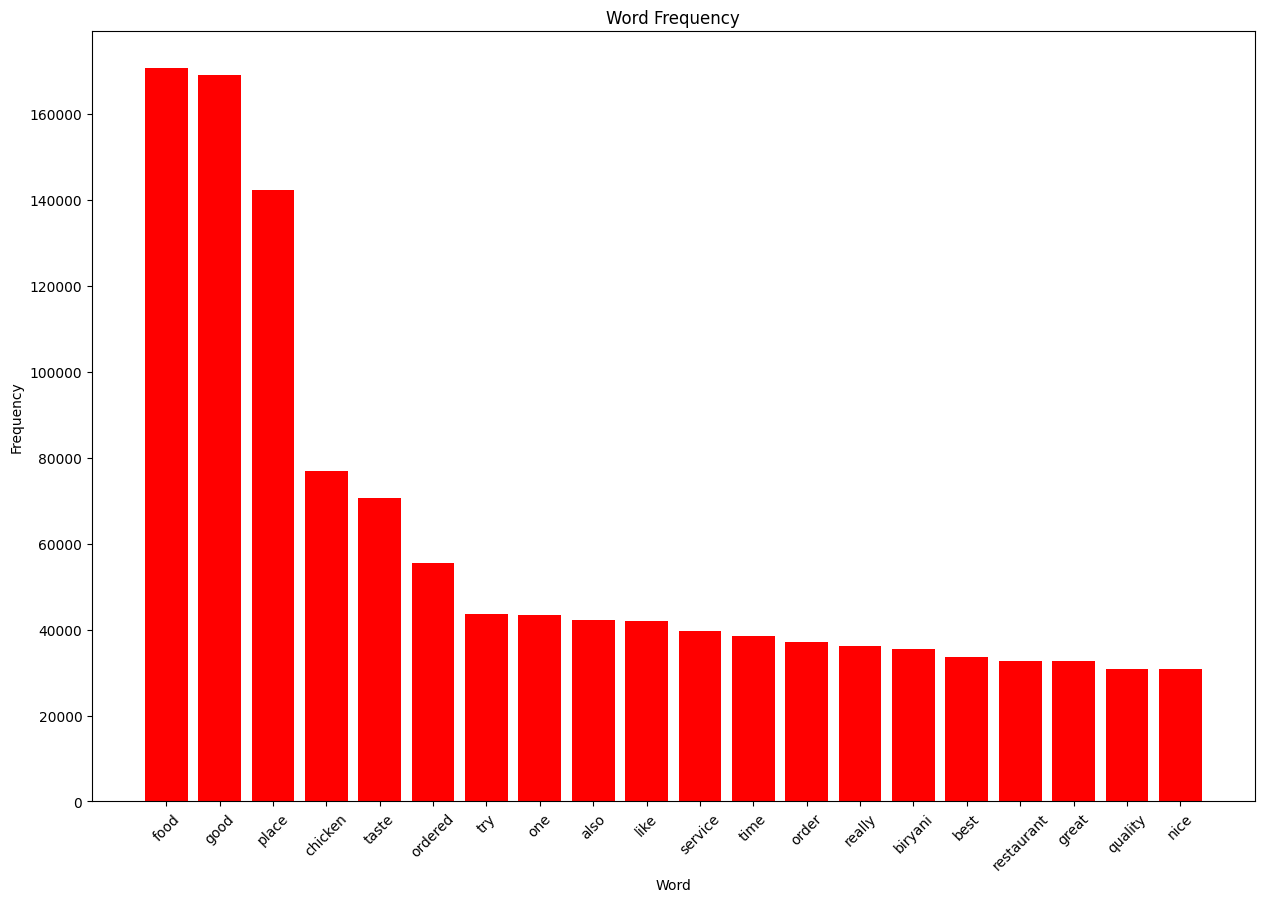

In [40]:
plt.figure(figsize=(15,10))
plt.bar(word1,word2,color='red')
plt.title('Word Frequency')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [41]:
# Bigram Analysis - pair of words (1st word, 2nd word)
# Trigram Analysis - triple word (1st word, 2nd word, 3rd word)
from nltk import FreqDist,bigrams,trigrams
bi_gram=bigrams(total_reviews_1D)
bi_gram

<generator object bigrams at 0x141bea340>

In [42]:
# Getting the bigram frequency distribution
fd_bigrams = FreqDist()
for bigram in bi_gram:
    fd_bigrams[bigram] = fd_bigrams[bigram] + 1

In [43]:
fd_bigrams.most_common(20)

[(('must', 'try'), 13250),
 (('good', 'food'), 11531),
 (('food', 'good'), 11134),
 (('really', 'good'), 9919),
 (('north', 'indian'), 9059),
 (('pocket', 'friendly'), 8170),
 (('taste', 'good'), 8100),
 (('good', 'place'), 8055),
 (('value', 'money'), 7139),
 (('south', 'indian'), 7032),
 (('good', 'taste'), 6593),
 (('visit', 'place'), 6296),
 (('also', 'good'), 6170),
 (('one', 'best'), 6107),
 (('fried', 'rice'), 5960),
 (('quality', 'food'), 5822),
 (('chicken', 'biryani'), 5536),
 (('xa', 'xa'), 5351),
 (('non', 'veg'), 5296),
 (('ordered', 'chicken'), 5256)]

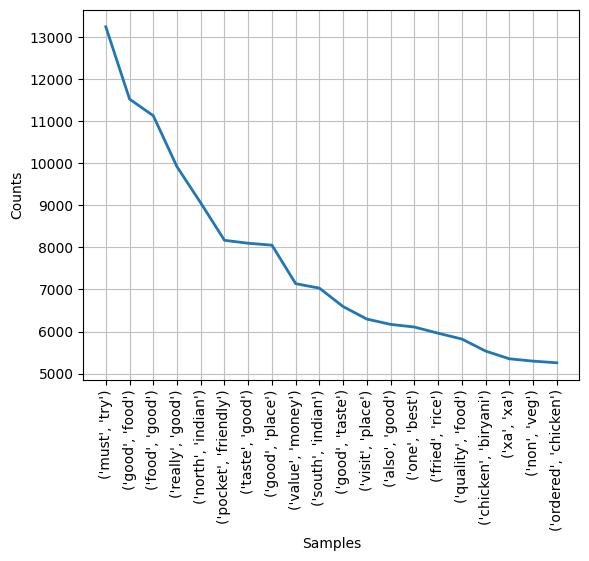

<Axes: xlabel='Samples', ylabel='Counts'>

In [44]:
fd_bigrams.plot(20)

In [45]:
tri_gram=trigrams(total_reviews_1D)
tri_gram

<generator object trigrams at 0x1436d09e0>

In [46]:
# Getting the bigram frequency distribution
fd_trigrams = FreqDist()
for trigram in tri_gram:
    fd_trigrams[trigram] = fd_trigrams[trigram] + 1

In [47]:
fd_trigrams.most_common(20)

[(('xa', 'xa', 'xa'), 5059),
 (('north', 'indian', 'food'), 3079),
 (('f', 'f', 'f'), 2581),
 (('paneer', 'butter', 'masala'), 1638),
 (('must', 'visit', 'place'), 1594),
 (('south', 'indian', 'food'), 1486),
 (('good', 'food', 'good'), 1367),
 (('ordered', 'chicken', 'biryani'), 1275),
 (('pocket', 'friendly', 'place'), 1059),
 (('chicken', 'fried', 'rice'), 1050),
 (('f', 'c', 'f'), 1042),
 (('food', 'really', 'good'), 1021),
 (('veg', 'non', 'veg'), 1013),
 (('worst', 'food', 'ever'), 939),
 (('like', 'home', 'made'), 897),
 (('must', 'try', 'place'), 896),
 (('good', 'taste', 'good'), 827),
 (('good', 'value', 'money'), 825),
 (('south', 'indian', 'breakfast'), 816),
 (('home', 'made', 'food'), 787)]

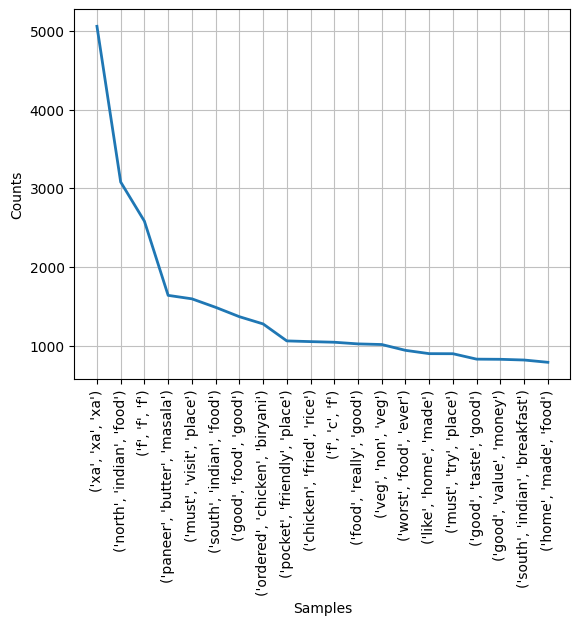

<Axes: xlabel='Samples', ylabel='Counts'>

In [48]:
fd_trigrams.plot(20)

In [49]:
# Extracting Geographical Coordinates from data
%pip install geocoder
%pip install geopy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [50]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
       'Bommanahalli', None, 'CV Raman Nagar', 'Electronic City', 'HSR',
       'Marathahalli', 'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar',
       'Koramangala 5th Block', 'Koramangala 8th Block', 'Richmond Road',
       'Koramangala 7th Block', 'Jalahalli', 'Koramangala 4th Block',
       'Bellandur', 'Whitefield', 'East Bangalore', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'RT Nagar',
       'MG Road', 'Brigade Road', 'Lavelle Road', 'Church Street',
       'Ulsoor', 'Residency Road', 'Shivajinagar', 'Infantry Road',
       'St. Marks Road', 'Cunningham Road', 'Race Course Road',
       'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur',
       'Ejipura', 'Jeevan

In [51]:
df['location'] = df['location'] + " , Bangalore  , Karnataka , India "
df['location']

0           Banashankari , Bangalore  , Karnataka , India 
1           Banashankari , Bangalore  , Karnataka , India 
2           Banashankari , Bangalore  , Karnataka , India 
3           Banashankari , Bangalore  , Karnataka , India 
4           Basavanagudi , Bangalore  , Karnataka , India 
                               ...                        
51712         Whitefield , Bangalore  , Karnataka , India 
51713         Whitefield , Bangalore  , Karnataka , India 
51714         Whitefield , Bangalore  , Karnataka , India 
51715    ITPL Main Road, Whitefield , Bangalore  , Karn...
51716    ITPL Main Road, Whitefield , Bangalore  , Karn...
Name: location, Length: 51717, dtype: object

In [52]:
df_copy=df.copy()

In [53]:
df_copy['location'].isnull().sum()

np.int64(21)

In [54]:
df_copy = df_copy.dropna(subset=['location'])

In [55]:
location_df=pd.DataFrame(df_copy['location'].unique())

In [56]:
location_df.columns=['Location']
location_df.head()

Location
0     Banashankari , Bangalore  , Karnataka , India 
1     Basavanagudi , Bangalore  , Karnataka , India 
2      Mysore Road , Bangalore  , Karnataka , India 
3        Jayanagar , Bangalore  , Karnataka , India 
4  Kumaraswamy Layout , Bangalore  , Karnataka , ...

In [57]:
from geopy.geocoders import Nominatim
# assign timeout=None in order to get rid of timeout error..
geolocator = Nominatim(user_agent="app" , timeout=None)

In [58]:
lat=[]
lon=[]

for location in location_df['Location']:
    location = geolocator.geocode(location)
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [59]:
location_df['latitude'] = lat
location_df['longitude'] = lon

In [60]:
location_df.head()

Location   latitude  longitude
0     Banashankari , Bangalore  , Karnataka , India   12.939333  77.553982
1     Basavanagudi , Bangalore  , Karnataka , India   12.941726  77.575502
2      Mysore Road , Bangalore  , Karnataka , India   12.952813  77.541528
3        Jayanagar , Bangalore  , Karnataka , India   12.941849  77.586898
4  Kumaraswamy Layout , Bangalore  , Karnataka , ...  12.906768  77.559502

In [61]:
# Spatial Analysis
location_df.isnull().sum()

Location     0
latitude     2
longitude    2
dtype: int64

In [62]:
location_df[location_df['latitude'].isna()]

Location  latitude  longitude
79  Rammurthy Nagar , Bangalore  , Karnataka , India        NaN        NaN
85   Sadashiv Nagar , Bangalore  , Karnataka , India        NaN        NaN

In [63]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [64]:
location_df['latitude'][85]= 13.010316
location_df['longitude'][85]= 77.580569
location_df['latitude'][79] = 13.0120218
location_df['longitude'][79] = 77.6777817

In [65]:
# Geographical Heat Maps
df['cuisines'].isnull().sum()
df = df.dropna(subset=['cuisines'])
'''
let's find it out what are those areas where we have most number of North-Indian restaurants ?
ie let's extract data frame of only 'North Indian' cuisine restaurant.
'''
north_india = df[df['cuisines'].str.contains('North Indian')]

In [66]:
north_india.head()

index                                                url  \
0      0  https://www.zomato.com/bangalore/jalsa-banasha...   
1      1  https://www.zomato.com/bangalore/spice-elephan...   
3      3  https://www.zomato.com/bangalore/addhuri-udupi...   
4      4  https://www.zomato.com/bangalore/grand-village...   
5      5  https://www.zomato.com/bangalore/timepass-dinn...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   
5  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...        Timepass Dinner   

  online_order book_table  rate  votes                             phone  \
0          Yes        Yes   4.1    775    080 42297555\r\n+91 9743772233   
1          Yes         No   4.1    787                      080 41714161   
3           No         No   3.7     88                    +91 9620009302   
4           No         No   3.8    166  +91 8026612447\r\n+91 9901210005   
5          Yes         No   3.8    286  +91 9980040002\r\n+91 9980063005   

                                         location      rest_type  \
0  Banashankari , Bangalore  , Karnataka , India   Casual Dining   
1  Banashankari , Bangalore  , Karnataka , India   Casual Dining   
3  Banashankari , Bangalore  , Karnataka , India     Quick Bites   
4  Basavanagudi , Bangalore  , Karnataka , India   Casual Dining   
5  Basavanagudi , Bangalore  , Karnataka , India   Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   
5  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   
5                    North Indian                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   
5  [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari  
5          Buffet    Banashankari

In [67]:
north_india.shape

(21085, 18)

In [68]:
new_df2=north_india['location'].value_counts().reset_index().rename(columns={"location":"Location"})
new_df2

Location  count
0               BTM , Bangalore  , Karnataka , India    2469
1               HSR , Bangalore  , Karnataka , India    1123
2        Whitefield , Bangalore  , Karnataka , India    1059
3      Marathahalli , Bangalore  , Karnataka , India    1038
4          JP Nagar , Bangalore  , Karnataka , India     958
..                                                ...    ...
85           Hebbal , Bangalore  , Karnataka , India       4
86           Jakkur , Bangalore  , Karnataka , India       3
87  Central Bangalore , Bangalore  , Karnataka , I...      2
88   West Bangalore , Bangalore  , Karnataka , India       1
89           Peenya , Bangalore  , Karnataka , India       1

[90 rows x 2 columns]

In [69]:
location_df

Location   latitude  longitude
0      Banashankari , Bangalore  , Karnataka , India   12.939333  77.553982
1      Basavanagudi , Bangalore  , Karnataka , India   12.941726  77.575502
2       Mysore Road , Bangalore  , Karnataka , India   12.952813  77.541528
3         Jayanagar , Bangalore  , Karnataka , India   12.941849  77.586898
4   Kumaraswamy Layout , Bangalore  , Karnataka , ...  12.906768  77.559502
..                                                ...        ...        ...
88   West Bangalore , Bangalore  , Karnataka , India   13.009476  77.553089
89      Magadi Road , Bangalore  , Karnataka , India   12.975653  77.555355
90        Yelahanka , Bangalore  , Karnataka , India   13.100698  77.596345
91   Sahakara Nagar , Bangalore  , Karnataka , India   13.062147  77.580061
92           Peenya , Bangalore  , Karnataka , India   13.032942  77.527325

[93 rows x 3 columns]

In [70]:
heatmap_df = new_df2.merge(location_df , on='Location' , how='left')

In [71]:
heatmap_df.head()

Location  count   latitude  longitude
0           BTM , Bangalore  , Karnataka , India    2469  12.915971  77.616227
1           HSR , Bangalore  , Karnataka , India    1123  12.900563  77.649475
2    Whitefield , Bangalore  , Karnataka , India    1059  12.969637  77.749745
3  Marathahalli , Bangalore  , Karnataka , India    1038  12.955257  77.698416
4      JP Nagar , Bangalore  , Karnataka , India     958  12.909694  77.586607

In [72]:
%pip install folium

Note: you may need to restart the kernel to use updated packages.


In [73]:
import folium 
basemap = folium.Map()
basemap

In [74]:
from folium.plugins import HeatMap
HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
basemap

In [75]:
# Automating Analysis
def get_heatmap(cuisine):
    cuisine_df = df[df['cuisines'].str.contains(cuisine)]
    cuisine_rest_count = cuisine_df['location'].value_counts().reset_index().rename(columns={"location":"Location"})
    heatmap_df = cuisine_rest_count.merge(location_df , on='Location' , how='left')
    print(heatmap_df.head(4))
    basemap = folium.Map()
    HeatMap(heatmap_df[['latitude', 'longitude' , "count"]]).add_to(basemap)
    return basemap

In [76]:
get_heatmap('South Indian')

                                      Location  count   latitude  longitude
0        BTM , Bangalore  , Karnataka , India     815  12.915971  77.616227
1   JP Nagar , Bangalore  , Karnataka , India     437  12.909694  77.586607
2        HSR , Bangalore  , Karnataka , India     436  12.900563  77.649475
3  Jayanagar , Bangalore  , Karnataka , India     416  12.941849  77.586898


In [77]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ...,
       'North Indian, Street Food, Biryani', 'Chinese, Mughlai',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)